# Separating the effect of reward from corrective feedback during learning in patients with Parkinson’s disease

Parkinson’s disease (PD) is associated with procedural learning deficits. Nonetheless, studies have demonstrated that reward-related learning is comparable between patients with PD and controls (Bódi et al., Brain, 132(9), 2385–2395, 2009; Frank, Seeberger, & O’Reilly, Science, 306(5703), 1940–1943, 2004; Palminteri et al., Proceedings of the National Academy of Sciences of the United States of America, 106(45), 19179–19184, 2009). However, because these studies do not separate the effect of reward from the effect of practice, it is difficult to determine whether the effect of reward on learning is distinct from the effect of corrective feedback on learning. Thus, it is unknown whether these group differences in learning are due to reward processing or learning in general. Here, we compared the performance of medicated PD patients to demographically matched healthy controls (HCs) on a task where the effect of reward can be examined separately from the effect of practice. We found that patients with PD showed significantly less reward-related learning improvements compared to HCs. In addition, stronger learning of rewarded associations over unrewarded associations was significantly correlated with smaller skin-conductance responses for HCs but not PD patients. These results demonstrate that when separating the effect of reward from the effect of corrective feedback, PD patients do not benefit from reward.

Experimental Design 11 Blocks: Practice (1 block) Training (8 blocks) Transfer (1 block) Questionnaire (1 block)

Participants responded with either the right index or middle on a serial response box to two face stimuli shown on a computer screen. During training half of the stimulus pairs yielded a reward if performed correctly within the 3 second trial limit, while the remaining chords only yielded positive feedback if performed correctly within the time limit. Incorrect or late repsonses yielded negative feedback. The sole transfer block was identical to the training blocks except that feedback was not given. The questionnaire was identical to Experiment 1

The data (Reward_Learning_and_PD.csv) and code (Reward_Learning_and_PD.ipynb) provided are intended to be used in a Jupyter notebook on Google Colab.


## Data Dictionary
| Column | Definition |
| ------ | ---------- |
| Subject | Subject ID |
| Group | Normal Comparisons (NC) or patients with Parkinson's disease (PD) |
| rmapping | Counterbalancing group related to mapping of responses to stimuli |
| CB | Counterbalancing group that includes rmapping and mapping of stimulus sets to screen side (left or right) |
| RT | Time (in milliseconds) to respond on each trial |
| Acc | Binary variable (0 or 1) indicating the accuracy of the repsonse |
| Block | Experiment block where (2 = practice block, 3-10 = training blocks with rewards, 11 = transfer block with no rewards, 12 = explicit memory questionnaire) |
| Trial | Trial number for each block |
| F1 | Stimulus picture presented on the left side of the screen |
| F2 | Stimulus picture presented on the right side of the screen |
| Resp | Participant response (1 or 2) |
| Chord | Two digit number combining the stimulus numbers for the left and right pictures |
| CResp | Correct response for each trial |
| RewardType | Variable indicating whether the pair of pictures shown will yeild a monetary reward if the participant is correct during the training blocks (0 or 1) |
| Rewarded | Variable indicating whether the participant received a reward on that trial (0 or 1) |
| PrevReward | Indicates whether the participant received a reward on the previous trial (0 or 1) |
| AfterReward | Indicates the RewardType of the previous trial stimulus pair (0 or 1) |
| PrevAcc | Indicates the accuracy of the previous trial |
| GoodFast | Indicates whether the response time of the trial is acceptable (above 300 ms and below 2000 ms; 0 or 1) |
| Repeats | Indicates whether the current trial includes the same pair of stimuli as the previous trial |
| Useable | Indicates whether the current and previous trial were performed accurately, within the 300-2000 ms window, and were not repeats (0 or 1). |
| Reward | Indicates the accuracy of the previous trial (0 or 1) |
| Qchord | Stimulus pair shown during the explicit memory questionnaire. |
| Qconf | Participant's self-reported confidence (from 0 to 9) in identifying stimulus pairs that were rewarded during training, where 0 equals no confidence and 9 indicates full confidence.  |
| QRecall | Accuracy on recall phase of explicit memory questionnaire (8 total trials per participant; 0 or 1) |
| QRespQ | Response (y or n) on recall phase of explicit memory questionnaire. |
| Composite Awareness | Metric of participant's explicit memory for rewarded stimulus pairs (ranges from 0 to 2, where 0 equals poor explicit memory and 2 equals full explicit memory) |
| Drop | Indicates subjects whose performance was perfect and thus impossible to measure a reward effect. It is recommended that these subjects be dropped from the analysis. |
| WM | Score from Digits backwards working memory task (max score = 15) |
| Med_Split | Variable dividing both groups (NC and PD) into two subgroups, where 1 indicates above median accuracy on transfer block and -1 indicates below median accuracy |

## Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Reward_Learning_and_PD/Reward_Learning_and_PD.csv')
df_nr = df.copy()
df_nr.drop(df[df['Drop'] == 1].index, inplace=True) # Remove subjects with perfect transfer block accuracy

Exploratory Data Analysis

In [4]:
# First five rows
df_nr.head()

,Subject,Group,rmapping,CB,RT,Acc,Block,Trial,F1,F2,...,Useable,Reward,Qchord,Qconf,QRecall,QRespQ,Composite Awareness,Drop,WM,Med_Split
0,111,NC,8,15,NaN,NaN,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,0.847222,0,8,1
1,111,NC,8,15,NaN,NaN,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,0.847222,0,8,1
2,111,NC,8,15,2694.0,1.0,2,1,Face2.jpg,Face7.jpg,...,1,0,NaN,NaN,NaN,NaN,0.847222,0,8,1
3,111,NC,8,15,2372.0,1.0,2,2,Face3.jpg,Face8.jpg,...,1,0,NaN,NaN,NaN,NaN,0.847222,0,8,1
4,111,NC,8,15,1921.0,0.0,2,3,Face2.jpg,Face7.jpg,...,1,0,NaN,NaN,NaN,NaN,0.847222,0,8,1


In [5]:
# Last five rows
df_nr.tail()

,Subject,Group,rmapping,CB,RT,Acc,Block,Trial,F1,F2,...,Useable,Reward,Qchord,Qconf,QRecall,QRespQ,Composite Awareness,Drop,WM,Med_Split
12900,228,PD,7,4,NaN,NaN,12,4,Face7.jpg,Face3.jpg,...,0,0,73.0,0.0,0.0,y,0.5,0,9,-1
12901,228,PD,7,4,NaN,NaN,12,5,Face7.jpg,Face1.jpg,...,0,1,71.0,0.0,0.0,n,0.5,0,9,-1
12902,228,PD,7,4,NaN,NaN,12,6,Face6.jpg,Face2.jpg,...,0,1,62.0,0.0,0.0,n,0.5,0,9,-1
12903,228,PD,7,4,NaN,NaN,12,7,Face8.jpg,Face1.jpg,...,0,0,81.0,0.0,1.0,n,0.5,0,9,-1
12904,228,PD,7,4,NaN,NaN,12,8,Face8.jpg,Face3.jpg,...,0,1,83.0,0.0,1.0,y,0.5,0,9,-1


In [6]:
# Data frame shape
print("There are ", df_nr.shape[0], " rows and ", df_nr.shape[1], " columns in the dataset.", sep = "")

There are 12905 rows and 30 columns in the dataset.


In [7]:
# Data frame information
df_nr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12905 entries, 0 to 12904
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Subject              12905 non-null  int64  
 1   Group                12905 non-null  object 
 2   rmapping             12905 non-null  int64  
 3   CB                   12905 non-null  int64  
 4   RT                   12580 non-null  float64
 5   Acc                  12580 non-null  float64
 6   Block                12905 non-null  int64  
 7   Trial                12905 non-null  int64  
 8   F1                   12905 non-null  object 
 9   F2                   12905 non-null  object 
 10  Resp                 12513 non-null  float64
 11  Chord                12867 non-null  float64
 12  CResp                12580 non-null  float64
 13  RewardType           12905 non-null  int64  
 14  Rewarded             12905 non-null  int64  
 15  PrevReward           12905 non-null 

In [8]:
# Statistical summary
df_nr.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject,12905.0,156.956219,49.443495,101.00,110.0,125.000000,208.000000,228.000000
rmapping,12905.0,4.582100,2.252526,1.00,3.0,5.000000,7.000000,8.000000
CB,12905.0,8.441999,4.517178,1.00,4.0,8.000000,12.000000,16.000000
RT,12580.0,1875.358506,815.811458,0.00,1276.0,1710.500000,2316.000000,4981.000000
Acc,12580.0,0.612719,0.487148,0.00,0.0,1.000000,1.000000,1.000000
Block,12905.0,6.487563,3.234173,1.00,3.0,6.000000,9.000000,12.000000
Trial,12905.0,19.052925,13.016499,0.00,9.0,18.000000,26.000000,60.000000
Resp,12513.0,1.478542,0.499559,1.00,1.0,1.000000,2.000000,2.000000
Chord,12867.0,49.552810,21.250705,15.00,35.0,51.000000,64.000000,84.000000
CResp,12580.0,1.496820,0.500010,1.00,1.0,1.000000,2.000000,2.000000


In [9]:
# Check for null values
print(df_nr.isnull().sum())
print("There are", df_nr.isnull().sum().sum(), "null values.")

Subject                    0
Group                      0
rmapping                   0
CB                         0
RT                       325
Acc                      325
Block                      0
Trial                      0
F1                         0
F2                         0
Resp                     392
Chord                     38
CResp                    325
RewardType                 0
Rewarded                   0
PrevReward                 0
AfterReward                0
PrevAcc                    0
GoodFast                   0
Repeats                    0
Useable                    0
Reward                     0
Qchord                 12618
Qconf                  12618
QRecall                12618
QRespQ                 12618
Composite Awareness        0
Drop                       0
WM                         0
Med_Split                  0
dtype: int64
There are 51877 null values.


In [10]:
# Check for duplicated rows
print("There are", df_nr.duplicated().sum(), "duplicated rows.") # No duplicate rows

There are 0 duplicated rows.


## Training - RT

In [11]:
# Only include blocks 3-10
Training_df = df_nr[(df_nr['Block'] <= 10) & (df_nr['Block'] >= 3)]

In [12]:
# Clean data RT data by eliminating trials that are
Training_df_clean_RT = Training_df[(Training_df['Acc'] == 1) & # innacurate
                                   (Training_df['PrevAcc'] == 1) & # follwed by innacurate trials
                                   (Training_df['GoodFast'] == 1) & # too slow (>2000 ms) or fast (<300 ms), or
                                   (Training_df['Repeats'] == 0) # repeats of the previous trial
                                   ];

In [13]:
# Create data sets for rewarded and unrewarded RTs for NCs
NC_training_data_clean_RT = Training_df_clean_RT[Training_df_clean_RT['Group'] == 'NC']

# Mean
NC_Reward_train_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 1].groupby('Block')['RT'].mean()
NC_NoReward_train_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 0].groupby('Block')['RT'].mean()

# Standard deviation
NC_Reward_train_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 1].groupby('Block')['RT'].std()
NC_NoReward_train_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 0].groupby('Block')['RT'].std()

# Standard error of the mean
NC_R_sem_train_rt = NC_Reward_train_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)
NC_NR_sem_train_rt = NC_NoReward_train_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)

In [14]:
# Create data sets for rewarded and unrewarded RTs for PDs
PD_training_data_clean_RT = Training_df_clean_RT[Training_df_clean_RT['Group'] == 'PD']

# Mean
PD_Reward_train_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 1].groupby('Block')['RT'].mean()
PD_NoReward_train_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 0].groupby('Block')['RT'].mean()

# Standard deviation
PD_Reward_train_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 1].groupby('Block')['RT'].std()
PD_NoReward_train_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 0].groupby('Block')['RT'].std()

# Standard error of the mean
PD_R_sem_train_rt = PD_Reward_train_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)
PD_NR_sem_train_rt = PD_NoReward_train_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)

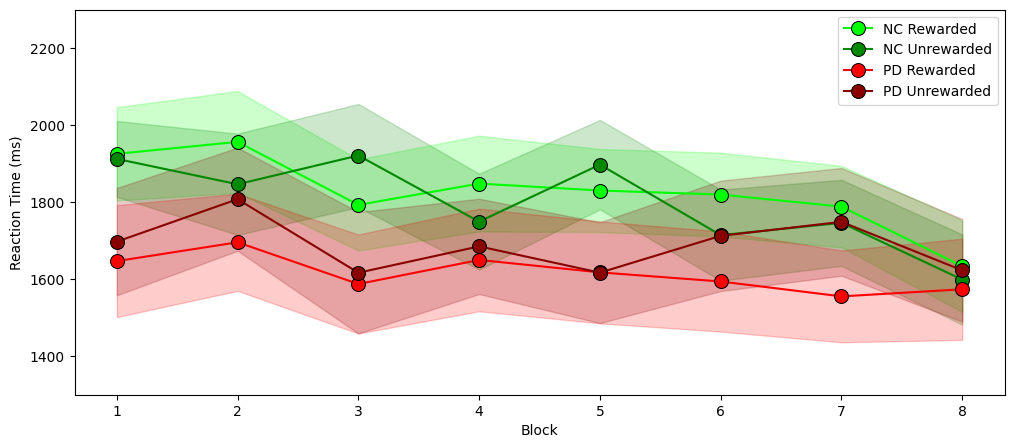

In [15]:
# Training data (RT) Plot
NC_Training_plot_RT_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': NC_Reward_train_m_rt, 'Unrewarded': NC_NoReward_train_m_rt})
PD_Training_plot_RT_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': PD_Reward_train_m_rt, 'Unrewarded': PD_NoReward_train_m_rt})


plt.figure(figsize=(12,5))
# NC Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_RT_df,
             label='NC Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_RT_df,
             label='NC Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_train_m_rt - NC_R_sem_train_rt, NC_Reward_train_m_rt + NC_R_sem_train_rt, color='#00FF00', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NC_NoReward_train_m_rt - NC_NR_sem_train_rt, NC_NoReward_train_m_rt + NC_NR_sem_train_rt, color='#008800', alpha=0.2);

# PD Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_RT_df,
             label='PD Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_RT_df,
             label='PD Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PD
plt.fill_between(np.arange(1,9,1), PD_Reward_train_m_rt - PD_R_sem_train_rt, PD_Reward_train_m_rt + PD_R_sem_train_rt, color='#FF0000', alpha=0.2);
plt.fill_between(np.arange(1,9,1), PD_NoReward_train_m_rt - PD_NR_sem_train_rt, PD_NoReward_train_m_rt + PD_NR_sem_train_rt, color='#880000', alpha=0.2);

# Details
plt.xlabel('Block');
plt.ylabel('Reaction Time (ms)');
plt.ylim(1300, 2300);
plt.show()

## Training - Accuracy

In [16]:
# Clean accuracy data by eliminating trials that are
Training_df_clean_Acc = Training_df[(Training_df['PrevAcc'] == 1) & # followed by inaccurate trials
                                    (Training_df['GoodFast'] == 1) & # too slow (> 2000 ms) or too fast (< 300 ms)
                                    (Training_df['Repeats'] == 0) # repeats of the previous trial
                                    ];

In [17]:
# Create data sets for rewarded and unrewarded Accuracy for NCs
NC_training_data_clean_Acc = Training_df_clean_Acc[Training_df_clean_Acc['Group'] == 'NC']

# Mean
NC_Reward_train_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].mean()
NC_NoReward_train_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].mean()

# Standard Deviation
NC_Reward_train_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].std()
NC_NoReward_train_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean
NC_R_sem_train_acc = NC_Reward_train_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)
NC_NR_sem_train_acc = NC_NoReward_train_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)

In [18]:
# Create data sets for rewarded and unrewarded Accuracy for PDs
PD_training_data_clean_Acc = Training_df_clean_Acc[Training_df_clean_Acc['Group'] == 'PD']

# Mean
PD_Reward_train_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].mean()
PD_NoReward_train_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].mean()

# Standard deviation
PD_Reward_train_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].std()
PD_NoReward_train_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean
PD_R_sem_train_acc = PD_Reward_train_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)
PD_NR_sem_train_acc = PD_NoReward_train_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)

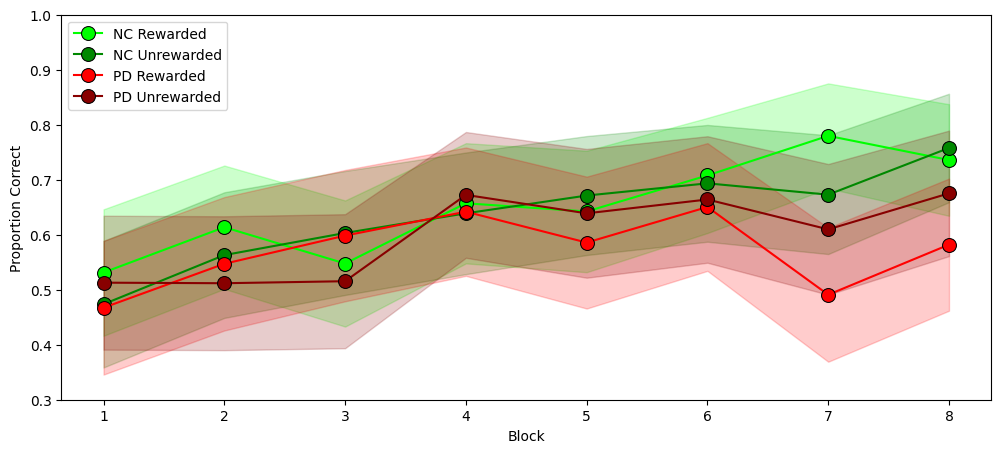

In [19]:
# Training data (Acc) Plot
NC_Training_plot_Acc_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': NC_Reward_train_m_acc, 'Unrewarded': NC_NoReward_train_m_acc})
PD_Training_plot_Acc_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': PD_Reward_train_m_acc, 'Unrewarded': PD_NoReward_train_m_acc})


plt.figure(figsize=(12,5))
# NC Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_Acc_df,
             label='NC Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_Acc_df,
             label='NC Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_train_m_acc - NC_R_sem_train_acc, NC_Reward_train_m_acc + NC_R_sem_train_acc, color='#00FF00', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NC_NoReward_train_m_acc - NC_NR_sem_train_acc, NC_NoReward_train_m_acc + NC_NR_sem_train_acc, color='#008800', alpha=0.2);

# PD Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_Acc_df,
             label='PD Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_Acc_df,
             label='PD Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PD
plt.fill_between(np.arange(1,9,1), PD_Reward_train_m_acc - PD_R_sem_train_acc, PD_Reward_train_m_acc + PD_R_sem_train_acc, color='#FF0000', alpha=0.2);
plt.fill_between(np.arange(1,9,1), PD_NoReward_train_m_acc - PD_NR_sem_train_acc, PD_NoReward_train_m_acc + PD_NR_sem_train_acc, color='#880000', alpha=0.2);

# Details
plt.xlabel('Block');
plt.ylabel('Proportion Correct');
plt.ylim(0.3, 1);
plt.show()

### After Rewarded RT

In [20]:
# Create data sets for RTs after a reward or no reward for NCs

# Means
NC_Reward_after_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].mean()
NC_NoReward_after_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].mean()

# Standard deviation
NC_Reward_after_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].std()
NC_NoReward_after_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].std()

# Standard error of the mean
NC_R_sem_after_rt = NC_Reward_after_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)
NC_NR_sem_after_rt = NC_NoReward_after_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)

In [21]:
# Create data sets for RTs after a reward or no reward for PDs

# Mean
PD_Reward_after_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].mean()
PD_NoReward_after_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].mean()

# Standard Deviation
PD_Reward_after_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].std()
PD_NoReward_after_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].std()

# Standard error of the mean
PD_R_sem_after_rt = PD_Reward_after_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)
PD_NR_sem_after_rt = PD_NoReward_after_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)

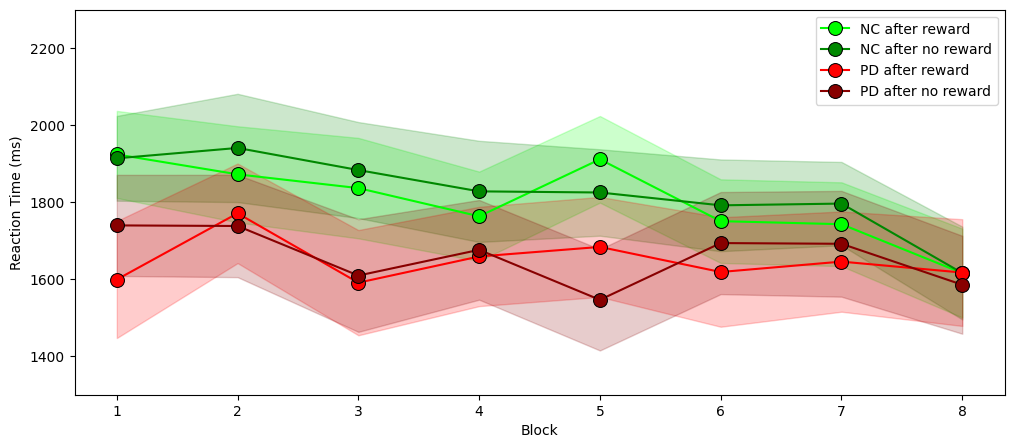

In [22]:
# After reward data (RT) Plot
NC_Training_plot_afterRT_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': NC_Reward_after_m_rt, 'Unrewarded': NC_NoReward_after_m_rt})
PD_Training_plot_afterRT_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': PD_Reward_after_m_rt, 'Unrewarded': PD_NoReward_after_m_rt})


plt.figure(figsize=(12,5))
# NC training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_afterRT_df,
             label='NC after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_afterRT_df,
             label='NC after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_after_m_rt - NC_R_sem_after_rt, NC_Reward_after_m_rt + NC_R_sem_after_rt, color='#00FF00', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NC_NoReward_after_m_rt - NC_NR_sem_after_rt, NC_NoReward_after_m_rt + NC_NR_sem_after_rt, color='#008800', alpha=0.2);

# PD training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_afterRT_df,
             label='PD after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_afterRT_df,
             label='PD after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PDs
plt.fill_between(np.arange(1,9,1), PD_Reward_after_m_rt - PD_R_sem_after_rt, PD_Reward_after_m_rt + PD_R_sem_after_rt, color='#FF0000', alpha=0.2);
plt.fill_between(np.arange(1,9,1), PD_NoReward_after_m_rt - PD_NR_sem_after_rt, PD_NoReward_after_m_rt + PD_NR_sem_after_rt, color='#880000', alpha=0.2);

# Details
plt.xlabel('Block');
plt.ylabel('Reaction Time (ms)');
plt.ylim(1300, 2300);
plt.show()

### After Reward Acc

In [23]:
# Create data sets for Accuracy after a reward or no reward for NCs

# Mean
NC_Reward_after_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].mean()
NC_NoReward_after_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].mean()

# Standard Deviation
NC_Reward_after_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].std()
NC_NoReward_after_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean
NC_R_sem_after_acc = NC_Reward_after_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)
NC_NR_sem_after_acc = NC_NoReward_after_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)

In [24]:
# Create data sets for Accuracy after a reward or no reward for PDs

# Mean
PD_Reward_after_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].mean()
PD_NoReward_after_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].mean()

# Standard Deviation
PD_Reward_after_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].std()
PD_NoReward_after_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean
PD_R_sem_after_acc = PD_Reward_after_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)
PD_NR_sem_after_acc = PD_NoReward_after_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)

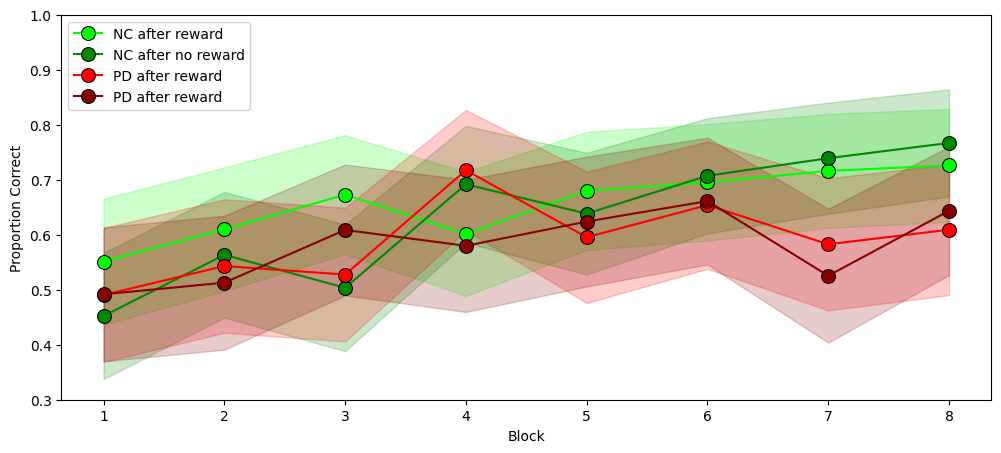

In [25]:
# After reward data (Acc) Plot
NC_Training_plot_afterAcc_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': NC_Reward_after_m_acc, 'Unrewarded': NC_NoReward_after_m_acc})
PD_Training_plot_afterAcc_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': PD_Reward_after_m_acc, 'Unrewarded': PD_NoReward_after_m_acc})


plt.figure(figsize=(12,5))
# NC training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_afterAcc_df,
             label='NC after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_afterAcc_df,
             label='NC after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_after_m_acc - NC_R_sem_after_acc, NC_Reward_after_m_acc + NC_R_sem_after_acc, color='#00FF00', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NC_NoReward_after_m_acc - NC_NR_sem_after_acc, NC_NoReward_after_m_acc + NC_NR_sem_after_acc, color='#008800', alpha=0.2);

# PD training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_afterAcc_df,
             label='PD after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_afterAcc_df,
             label='PD after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PDs
plt.fill_between(np.arange(1,9,1), PD_Reward_after_m_acc - PD_R_sem_after_acc, PD_Reward_after_m_acc + PD_R_sem_after_acc, color='#FF0000', alpha=0.2);
plt.fill_between(np.arange(1,9,1), PD_NoReward_after_m_acc - PD_NR_sem_after_acc, PD_NoReward_after_m_acc + PD_NR_sem_after_acc, color='#880000', alpha=0.2);

# Details
plt.xlabel('Block');
plt.ylabel('Proportion Correct');
plt.ylim(0.3, 1);
plt.show()

## Transfer RT

In [26]:
# Only include block 11 and clean data
Transfer_df = df_nr[(df_nr['Block'] == 11)]

# Eliminate trials that are...
Transfer_df_clean_RT =Transfer_df[(Transfer_df['GoodFast'] == 1) & # Too slow (> 2000 ms) or too fast (< 300 ms), or
                                  (Transfer_df['Acc'] == 1)]; # Innacurate

# Glance at data
Transfer_df_clean_RT.head()

,Subject,Group,rmapping,CB,RT,Acc,Block,Trial,F1,F2,...,Useable,Reward,Qchord,Qconf,QRecall,QRespQ,Composite Awareness,Drop,WM,Med_Split
293,111,NC,8,15,1780.0,1.0,11,2,Face2.jpg,Face5.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0,8,1
295,111,NC,8,15,1002.0,1.0,11,4,Face1.jpg,Face5.jpg,...,0,0,NaN,NaN,NaN,NaN,0.847222,0,8,1
296,111,NC,8,15,1573.0,1.0,11,5,Face2.jpg,Face5.jpg,...,1,1,NaN,NaN,NaN,NaN,0.847222,0,8,1
297,111,NC,8,15,1488.0,1.0,11,6,Face1.jpg,Face7.jpg,...,1,1,NaN,NaN,NaN,NaN,0.847222,0,8,1
298,111,NC,8,15,1218.0,1.0,11,7,Face3.jpg,Face8.jpg,...,1,0,NaN,NaN,NaN,NaN,0.847222,0,8,1


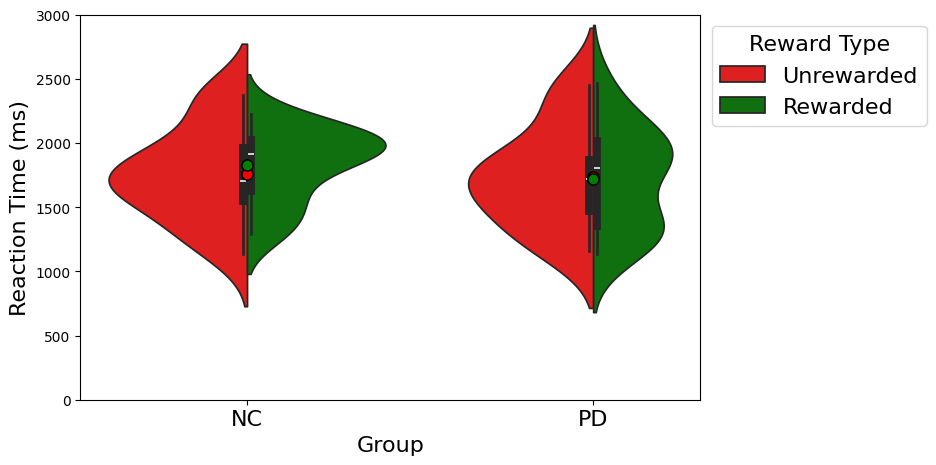

In [27]:
# Plot transfer RT data for each group (NC and PD) and Reward type (rewarded vs. unrewarded)
plt.figure(figsize=(8,5))
plot_data = Transfer_df_clean_RT.groupby(['Group','RewardType','Subject'])['RT'].mean().reset_index()
ax = sns.violinplot(x='Group', y='RT', hue = 'RewardType',data=plot_data, palette=['red','green'],split = True, );

# Add means to plot
Mns = Transfer_df_clean_RT.groupby(['Group','RewardType','Subject'])['RT'].mean()
Mns_avg = Mns.groupby(level=[0,1]).mean()

for g in ['NC','PD']:
    for i, mean in enumerate(Mns_avg[g]):
      if i == 0:
        ax.plot(g, mean, marker='o', color='red', markersize=8, markeredgecolor = 'black')
      else:
        ax.plot(g, mean, marker='o', color='green', markersize=8, markeredgecolor = 'black')

# Get the handles and labels
handles, labels = ax.get_legend_handles_labels()

# Modify the labels
new_labels = ['Unrewarded', 'Rewarded']

# Remove the old legend
ax.legend_.remove()

# Create new legend with modified labels
ax.legend(handles, new_labels, title='Reward Type', fontsize = 16)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16)

# Details
ax.set_xticks([0, 1]);
ax.set_xlabel('Group', fontsize = 16);
plt.setp(ax.get_legend().get_title(), fontsize='16')
ax.set_xticklabels(["NC", "PD"],fontsize = 16)
ax.set_ylabel('Reaction Time (ms)',fontsize = 16);
plt.ylim(0,3000);
plt.show()

In [28]:
#### Assumption 1: Normality

w_shapiro_transfer_rt, p_value_shapiro_transfer_rt = stats.shapiro(Transfer_df_clean_RT['RT'])
print('Because the p-value is ', p_value_shapiro_transfer_rt, " ...", sep = '')

if p_value_shapiro_transfer_rt < 0.05:
  print("We reject the null hypothesis that RT data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that RT data are normally distributed.')

Because the p-value is 2.6414397829373983e-16 ...
We reject the null hypothesis that RT data are normally distributed.


In [29]:
#### Assumption 2: Homogeneity of Variance
statistic_levenes_transfer_rt, p_value_levenes_transfer_RT = levene( Transfer_df_clean_RT['RT'][Transfer_df_clean_RT['RewardType']==0],
                                                                     Transfer_df_clean_RT['RT'][Transfer_df_clean_RT['RewardType']==1]);
print('Because the p-value is ', round(p_value_levenes_transfer_RT,4),"...", sep = '')

if p_value_levenes_transfer_RT < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.7413...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [30]:
# Significance testing using two-way ANOVA

formula = 'RT ~ C(RewardType) + C(Group) + C(RewardType):C(Group)'
model = ols(formula, data=Transfer_df_clean_RT).fit()

# calculate the p-value using a two-way ANOVA test
anova_table = sm.stats.anova_lm(model, typ=3)

print(' ------------- Results for transfer RT data -------------')
print("The reward F-statistic is ", round(anova_table['F'].iloc[0],3), " and the p-value is ", anova_table['PR(>F)'].iloc[0],".",sep="")
print("The group F-statistic is ", round(anova_table['F'].iloc[1],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[1],4),".",sep="")
print("The interaction F-statistic is ", round(anova_table['F'].iloc[2],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[2],4),".",sep="")

 ------------- Results for transfer RT data -------------
The reward F-statistic is 2519.634 and the p-value is 7.723486697830067e-274.
The group F-statistic is 8.914 and the p-value is 0.0029.
The interaction F-statistic is 1.894 and the p-value is 0.169.


### Result: Rewarded chords were performed significantly slower than unrewarded chords. NCs responded significantly faster than PDs. No difference in the effect of reward on RTs was identified.

## Transfer Acc

In [71]:
# Eliminate trials from Block 11 that are...
Transfer_df_clean_Acc = Transfer_df[(Transfer_df['GoodFast'] == 1)]; # Too slow (>2000 ms) or too fast (<300 ms)

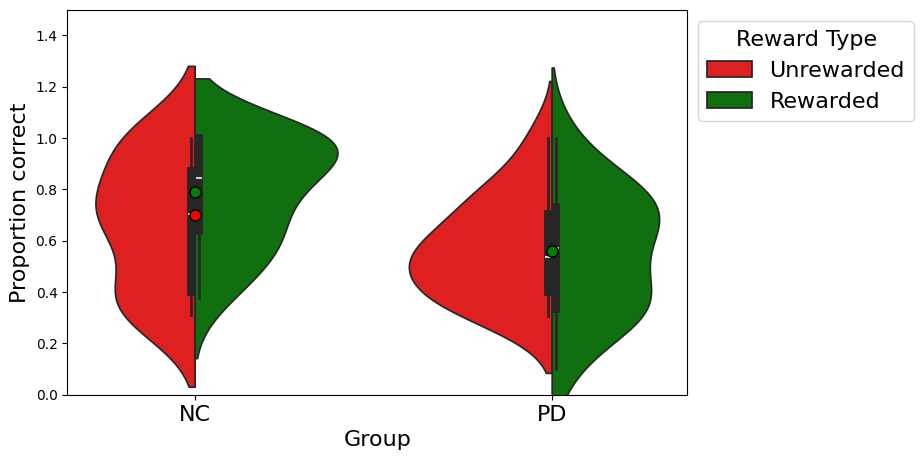

In [32]:
# Plot transfer accuracy data for each group (NC and PD) and Reward type (rewarded vs. unrewarded)
plt.figure(figsize=(8,5))
plot_data = Transfer_df_clean_Acc.groupby(['Group','RewardType','Subject'])['Acc'].mean().reset_index()
ax = sns.violinplot(x='Group', y='Acc', hue = 'RewardType',data=plot_data, palette=['red','green'],split = True);

# Add means to plot
Mns = Transfer_df_clean_Acc.groupby(['Group','RewardType'])['Acc'].mean()
Mns_avg = Mns.groupby(level=[0,1]).mean()

for g in ['NC','PD']:
    for i, mean in enumerate(Mns_avg[g]):
      if i == 0:
        ax.plot(g, mean, marker='o', color='red', markersize=8, markeredgecolor = 'black')
      else:
        ax.plot(g, mean, marker='o', color='green', markersize=8, markeredgecolor = 'black')

# Get the handles and labels
handles, labels = ax.get_legend_handles_labels()

# Modify the labels
new_labels = ['Unrewarded', 'Rewarded']

# Remove the old legend
ax.legend_.remove()

# Create new legend with modified labels
ax.legend(handles, new_labels, title='Reward Type', fontsize = 16)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16)

# Details
ax.set_xticks([0, 1]);
ax.set_xlabel('Group', fontsize = 16);
plt.setp(ax.get_legend().get_title(), fontsize='16')
ax.set_xticklabels(["NC", "PD"],fontsize = 16)
ax.set_ylabel('Proportion correct',fontsize = 16);
plt.ylim(0,1.5);
plt.show()

In [33]:
#### Assumption 1: Normality
w_shapiro_transfer_acc, p_value_shapiro_transfer_acc = stats.shapiro(Transfer_df_clean_Acc['Acc'])
print('Because the p-value is ', p_value_shapiro_transfer_acc," ...", sep = '')

if p_value_shapiro_transfer_acc < 0.05:
  print("We reject the null hypothesis that accuracy data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that accuracy data are normally distributed.')

Because the p-value is 2.895986402727554e-50 ...
We reject the null hypothesis that accuracy data are normally distributed.


In [34]:
#### Assumption 2: Homogeneity of Variance
statistic_levenes_transfer_acc, p_value_levenes_transfer_acc = levene( Transfer_df_clean_Acc['Acc'][Transfer_df_clean_Acc['RewardType']==0],
                                                                       Transfer_df_clean_Acc['Acc'][Transfer_df_clean_Acc['RewardType']==1]);
#### find the p-value of Levene's test
print('Because the p-value is ', round(p_value_levenes_transfer_acc,7),"...", sep = '')

if p_value_levenes_transfer_acc < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.0513772...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [35]:
# Significance testing using two-way ANOVA

formula = 'Acc ~ C(RewardType) + C(Group) + C(RewardType):C(Group)'
model = ols(formula, data=Transfer_df_clean_Acc).fit()

# calculate the p-value using a two-way ANOVA test
anova_table = sm.stats.anova_lm(model, typ=3)
#print(anova_table)

print(' ------------- Results for transfer Acc data -------------')
print("The reward F-statistic is ", round(anova_table['F'].iloc[0],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[0],4),".",sep="")
print("The group F-statistic is ", round(anova_table['F'].iloc[1],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[1],4),".",sep="")
print("The interaction F-statistic is ", round(anova_table['F'].iloc[2],3), " and the p-value is ", anova_table['PR(>F)'].iloc[2],".",sep="")

 ------------- Results for transfer Acc data -------------
The reward F-statistic is 906.265 and the p-value is 0.0.
The group F-statistic is 7.68 and the p-value is 0.0057.
The interaction F-statistic is 17.45 and the p-value is 3.118481585349271e-05.


### Result: Rewarded chords were performed significantly more accurately than unrewarded chords. NCs were significantly more accurate than PDs. Patients with PD experienced a significantly reduced reward effect compared to NCs. Patients with PD experience a diminshed effect of reward on accuracy.

## Median Split Analysis

In [77]:
# Split data into four groups

# NCs with higher overall accuracy
NC_High = Transfer_df_clean_Acc[(Transfer_df_clean_Acc['Group'] == 'NC') & (Transfer_df_clean_Acc['Med_Split']==1)]
NC_High_rew = NC_High[NC_High['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
NC_High_unr = NC_High[NC_High['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

# NCs with higher overall accuracy
NC_Low = Transfer_df_clean_Acc[(Transfer_df_clean_Acc['Group'] == 'NC') & (Transfer_df_clean_Acc['Med_Split']==-1)]
NC_Low_rew = NC_Low[NC_Low['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
NC_Low_unr = NC_Low[NC_Low['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

# NCs with higher overall accuracy
PD_High = Transfer_df_clean_Acc[(Transfer_df_clean_Acc['Group'] == 'PD') & (Transfer_df_clean_Acc['Med_Split']==1)]
PD_High_rew = PD_High[PD_High['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
PD_High_unr = PD_High[PD_High['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

# NCs with higher overall accuracy
PD_Low = Transfer_df_clean_Acc[(Transfer_df_clean_Acc['Group'] == 'PD') & (Transfer_df_clean_Acc['Med_Split']==-1)]
PD_Low_rew = PD_Low[PD_Low['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
PD_Low_unr = PD_Low[PD_Low['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

In [83]:
# Significance testing using paired t-tests

# Reward effect for NC with higher overall acc
NC_High_t_stat, NC_High_p_value = stats.ttest_ind(NC_High_rew, NC_High_unr, equal_var=True)
print(' ------------- Results for NC (higher overall accuracy) -------------')
print("Overall accuracy for NC High: ", round(NC_High['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(NC_High_t_stat,3), " and the p-value is ", round(NC_High_p_value,3),".",sep="")
print(' ')

# Reward effect for NC with lower overall acc
NC_Low_t_stat, NC_Low_p_value = stats.ttest_ind(NC_Low_rew, NC_Low_unr, equal_var=True)
print(' ------------- Results for NC (lower overall accuracy) -------------')
print("Overall accuracy for NC Low: ", round(NC_Low['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(NC_Low_t_stat,3), " and the p-value is ", round(NC_Low_p_value,3),".",sep="")
print(' ')

# Reward effect for PD with higher overall acc
PD_High_t_stat, PD_High_p_value = stats.ttest_ind(PD_High_rew, PD_High_unr, equal_var=True)
print(' ------------- Results for PD (higher overall accuracy) -------------')
print("Overall accuracy for PD High: ", round(PD_High['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(PD_High_t_stat,3), " and the p-value is ", round(PD_High_p_value,3),".",sep="")
print(' ')

# Reward effect for PD with lower overall acc
PD_Low_t_stat, PD_Low_p_value = stats.ttest_ind(PD_Low_rew, PD_Low_unr, equal_var=True)
print(' ------------- Results for PD (lower overall accuracy)-------------')
print("Overall accuracy for PD Low: ", round(PD_Low['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(PD_Low_t_stat,3), " and the p-value is ", round(PD_Low_p_value,3),".",sep="")


 ------------- Results for NC (higher overall accuracy) -------------
Overall accuracy for NC High: 0.919.
The t-statistic is 1.074 and the p-value is 0.299.
 
 ------------- Results for NC (lower overall accuracy) -------------
Overall accuracy for NC Low: 0.562.
The t-statistic is 2.387 and the p-value is 0.028.
 
 ------------- Results for PD (higher overall accuracy) -------------
Overall accuracy for PD High: 0.71.
The t-statistic is -0.193 and the p-value is 0.85.
 
 ------------- Results for PD (lower overall accuracy)-------------
Overall accuracy for PD Low: 0.443.
The t-statistic is -0.131 and the p-value is 0.898.


### Results: Even when isolating patients with Parkinson's diseas with higher overall accuracy, they show no effect of reward opn learning.

## Questionnaire

### Reaction Time Data

In [37]:
# Organize RT reward effects (NC)
NC_Transfer_df_clean_RT = Transfer_df_clean_RT[Transfer_df_clean_RT['Group'] == 'NC']
NC_All_Rs = NC_Transfer_df_clean_RT[NC_Transfer_df_clean_RT['RewardType']==1].groupby(NC_Transfer_df_clean_RT['Subject'])['RT'].mean()
NC_All_Us = NC_Transfer_df_clean_RT[NC_Transfer_df_clean_RT['RewardType']==0].groupby(NC_Transfer_df_clean_RT['Subject'])['RT'].mean()
NC_REffect_RT = NC_All_Rs - NC_All_Us

# Organize RT reward effects (PD)
PD_Transfer_df_clean_RT = Transfer_df_clean_RT[Transfer_df_clean_RT['Group'] == 'PD']
PD_All_Rs = PD_Transfer_df_clean_RT[PD_Transfer_df_clean_RT['RewardType']==1].groupby(PD_Transfer_df_clean_RT['Subject'])['RT'].mean()
PD_All_Us = PD_Transfer_df_clean_RT[PD_Transfer_df_clean_RT['RewardType']==0].groupby(PD_Transfer_df_clean_RT['Subject'])['RT'].mean()
PD_REffect_RT = PD_All_Rs - PD_All_Us

In [38]:
# Organize recall and composite awareness
Only_Q = df_nr[df_nr['Block'] == 12]
cAware_data = Only_Q.groupby(['Group','Subject'])['Composite Awareness'].mean()
recall_data = Only_Q.groupby(['Group','Subject'])['QRecall'].mean()
recall_data = recall_data.reset_index()
cAware_data = cAware_data.reset_index()

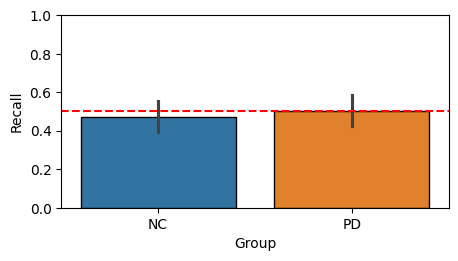

In [42]:
# Plot recall in relation to chance
plt.figure(figsize=(5,2.5))
sns.barplot(x = 'Group', y = 'QRecall', data = Only_Q, hue = 'Group',edgecolor = 'black')
plt.ylabel('Recall');
plt.xlabel('Group');
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.ylim(0,1);
plt.show()

In [56]:
# Test if recall is different from chance for NCs
# Correlations between reward effects, recall, and composite awareness (NC)
NC_recall = Only_Q[Only_Q['Group'] == 'NC'].groupby('Subject')['QRecall'].mean()
NC_cAware = Only_Q[Only_Q['Group'] == 'NC'].groupby('Subject')['Composite Awareness'].mean()
NC_Q_Data = pd.DataFrame({'Group': 'NC', 'Reward Effect': NC_REffect_RT,
                          'Recall': NC_recall, 'Composite Awareness': NC_cAware}
                         )

print("-" * 100)
sample_successes_nc = NC_Q_Data[NC_Q_Data['Recall'] > 0.5]['Recall'].count()
sample_size_nc = len(NC_Q_Data)
z_stat_nc_recall, p_value_nc_recall = sm.stats.proportions_ztest(
    sample_successes_nc, sample_size_nc, 0.5, alternative='larger'
);
print('NC explicit memory performance is not above chance: p = ', round(p_value_nc_recall,8),"...", sep = '')
print("-" * 100)

# Test if recall is different from chance for PDs
PD_recall = Only_Q[Only_Q['Group'] == 'PD'].groupby('Subject')['QRecall'].mean()
PD_cAware = Only_Q[Only_Q['Group'] == 'PD'].groupby('Subject')['Composite Awareness'].mean()
PD_Q_Data = pd.DataFrame({'Group': 'PD', 'Reward Effect': PD_REffect_RT,
                          'Recall': PD_recall, 'Composite Awareness': PD_cAware}
                         )

print("-" * 100)
sample_successes_pd = PD_Q_Data[PD_Q_Data['Recall'] > 0.5]['Recall'].count()
sample_size_pd = len(PD_Q_Data)
z_stat_pd_recall, p_value_pd_recall = sm.stats.proportions_ztest(
    sample_successes_pd, sample_size_pd, 0.5, alternative='larger'
);
print('PD explicit memory performance is not above chance: p = ', round(p_value_pd_recall,8),"...", sep = '')
print("-" * 100)

# Test whether explicit memory is different between groups
t_statistic_q_rt, p_value_q_rt = stats.ttest_ind(recall_data[recall_data['Group'] == 'NC']['QRecall'], recall_data[recall_data['Group'] == 'PD']['QRecall'])
print('Because the p-value is ', round(p_value_q_rt,8),"...", sep = '')
if p_value_q_rt < 0.05:
  print("We reject the null hypothesis that recall is the same between groups.")
else:
  print('We fail the reject the null hypothesis that recall is the same between groups.')

print("-" * 100)

----------------------------------------------------------------------------------------------------
NC explicit memory performance is not above chance: p = 0.95795373...
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PD explicit memory performance is not above chance: p = 0.99495855...
----------------------------------------------------------------------------------------------------
Because the p-value is 0.60580156...
We fail the reject the null hypothesis that recall is the same between groups.
----------------------------------------------------------------------------------------------------


### Result: There is no strong evidence that either group gained explicit awareness of which pairs were rewarded or that awareness differed between groups

In [58]:
# Correlations between reward effects, recall, and composite awareness (NC)
print(' ---------------------- NC Correlations ---------------------- ')
NC_Q_Data_flt = NC_Q_Data.drop(['Group'], axis=1)
print(NC_Q_Data_flt.corr())
print(' ')

# Correlations between reward effects, recall, and composite awareness (PD)
print(' ---------------------- PD Correlations ----------------------- ')
NC_Q_Data_flt = PD_Q_Data.drop(['Group'], axis=1)
print(NC_Q_Data_flt.corr())

 ---------------------- NC Correlations ---------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.056866             0.122872
Recall                   -0.056866  1.000000             0.534005
Composite Awareness       0.122872  0.534005             1.000000
 
 ---------------------- PD Correlations ----------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.144891            -0.156132
Recall                   -0.144891  1.000000             0.498708
Composite Awareness      -0.156132  0.498708             1.000000


In [67]:
# statistical testing on correlations for NCs
print(' ---------------------- NC Correlations ----------------------- ')
pearson_corr_nc_rt_recall, p_value_corr_nc_rt_recall = pearsonr(NC_REffect_RT, NC_recall)
print("NC Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_rt_recall,3), " and the p-value is ", round(p_value_corr_nc_rt_recall,8),".",sep="")
pearson_corr_nc_rt_ca, p_value_corr_nc_rt_ca = pearsonr(NC_REffect_RT, NC_cAware)
print("NC cAware and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_rt_ca,3), " and the p-value is ", round(p_value_corr_nc_rt_ca,8),".",sep="")

print(' ' )
# statistical testing on correlations for PDs
print(' ---------------------- PD Correlations ----------------------- ')
pearson_corr_pd_rt_recall, p_value_corr_pd_rt_recall = pearsonr(PD_REffect_RT, PD_recall)
print("PD Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_rt_recall,3), " and the p-value is ", round(p_value_corr_pd_rt_recall,8),".",sep="")
pearson_corr_pd_rt_ca, p_value_corr_pd_rt_ca = pearsonr(PD_REffect_RT, PD_cAware)
print("PD Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_rt_ca,3), " and the p-value is ", round(p_value_corr_pd_rt_ca,8),".",sep="")

# Recall was above chance but not associated with reward learning on RT

 ---------------------- NC Correlations ----------------------- 
NC Recall and reward effect: The Pearson correlation coefficient is -0.057 and the p-value is 0.8171355.
NC cAware and reward effect: The Pearson correlation coefficient is 0.123 and the p-value is 0.61627923.
 
 ---------------------- PD Correlations ----------------------- 
PD Recall and reward effect: The Pearson correlation coefficient is -0.145 and the p-value is 0.57900592.
PD Composite awareness and reward effect: The Pearson correlation coefficient is -0.156 and the p-value is 0.54957209.


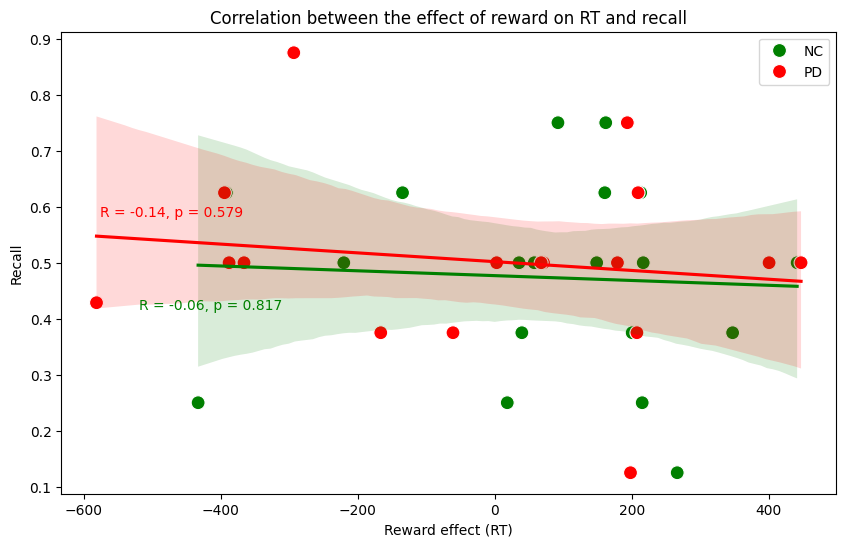

In [60]:
# Scatter plots - RT Reward effect and recall

# Combine dictionaries vertically
Combined_recall = pd.concat([NC_Q_Data, PD_Q_Data], axis=0)

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Recall', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (RT)')
plt.ylabel('Recall')
plt.title('Correlation between the effect of reward on RT and recall')
plt.text(0.05, 0.6, f'R = {pearson_corr_pd_rt_recall:.2f}, p = {p_value_corr_pd_rt_recall:.3f}', transform=plt.gca().transAxes,color = 'r')
plt.text(0.1, 0.4, f'R = {pearson_corr_nc_rt_recall:.2f}, p = {p_value_corr_nc_rt_recall:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

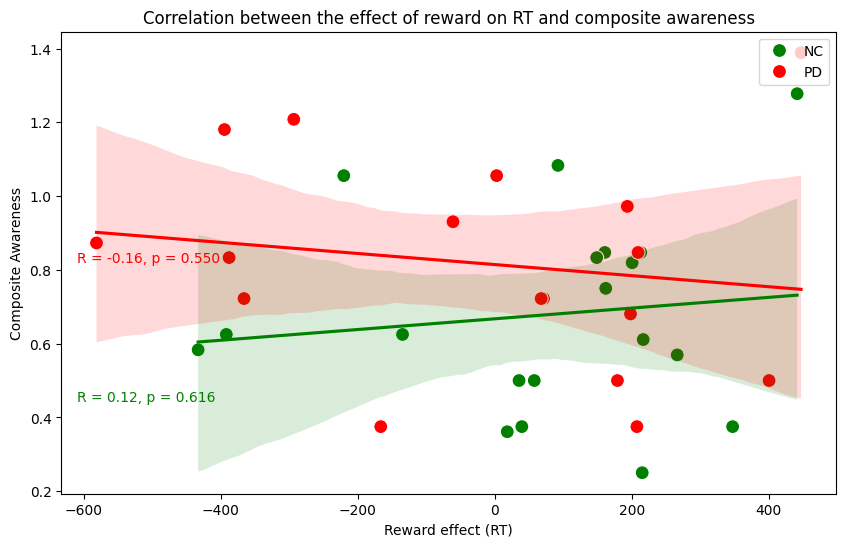

In [68]:
# Scatter plots - RT Reward effect and Composite Awareness

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Composite Awareness', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (RT)')
plt.ylabel('Composite Awareness')
plt.title('Correlation between the effect of reward on RT and composite awareness')
plt.text(0.02, 0.5, f'R = {pearson_corr_pd_rt_ca:.2f}, p = {p_value_corr_pd_rt_ca:.3f}', transform=plt.gca().transAxes, color = 'r')
plt.text(0.02, 0.2, f'R = {pearson_corr_nc_rt_ca:.2f}, p = {p_value_corr_nc_rt_ca:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

### Result: No strong evidence that the effect of reward on RT is associated with explicit sequence knowledge for either group.

### Accuracy data

In [69]:
# Organize reward effects (NC)
NC_Transfer_df_clean_Acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['Group'] == 'NC']
NC_All_Rs = NC_Transfer_df_clean_Acc[NC_Transfer_df_clean_Acc['RewardType']==1].groupby(NC_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
NC_All_Us = NC_Transfer_df_clean_Acc[NC_Transfer_df_clean_Acc['RewardType']==0].groupby(NC_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
NC_REffect_Acc = NC_All_Rs - NC_All_Us

# Organize reward effects (PD)
PD_Transfer_df_clean_Acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['Group'] == 'PD']
PD_All_Rs = PD_Transfer_df_clean_Acc[PD_Transfer_df_clean_Acc['RewardType']==1].groupby(PD_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
PD_All_Us = PD_Transfer_df_clean_Acc[PD_Transfer_df_clean_Acc['RewardType']==0].groupby(PD_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
PD_REffect_Acc = PD_All_Rs - PD_All_Us

In [70]:
# Organize recall and composite awareness
Only_Q = df_nr[df_nr['Block'] == 12]
cAware_data = Only_Q.groupby(['Group','Subject'])['Composite Awareness'].mean()
recall_data = Only_Q.groupby(['Group','Subject'])['QRecall'].mean()
recall_data = recall_data.reset_index()
cAware_data = cAware_data.reset_index()

In [75]:
# Correlations between reward effects, recall, and composite awareness (NC)
print(' ---------------------- NC Correlations ----------------------- ')
NC_Q_Data = pd.DataFrame({'Group': 'NC', 'Reward Effect': NC_REffect_Acc,
                          'Recall': NC_recall, 'Composite Awareness': NC_cAware}
                         )

NC_Q_Data_flt = NC_Q_Data.drop(['Group'], axis=1)
print(NC_Q_Data_flt.corr())
print(' ')

# Correlations between reward effects, recall, and composite awareness (PD)
print(' ---------------------- PD Correlations ----------------------- ')
PD_Q_Data = pd.DataFrame({'Group': 'PD', 'Reward Effect': PD_REffect_Acc,
                          'Recall': PD_recall, 'Composite Awareness': PD_cAware}
                         )

PD_Q_Data_flt = PD_Q_Data.drop(['Group'], axis=1)
print(PD_Q_Data_flt.corr())

 ---------------------- NC Correlations ----------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.091349             0.010895
Recall                   -0.091349  1.000000             0.534005
Composite Awareness       0.010895  0.534005             1.000000
 
 ---------------------- PD Correlations ----------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.677952            -0.486499
Recall                   -0.677952  1.000000             0.498708
Composite Awareness      -0.486499  0.498708             1.000000


In [76]:
# Statistical testing on correlations
print(' ---------------------- NC Correlations ----------------------- ')
pearson_corr_nc_acc_corr_recall, p_value_nc_acc_corr_recall = pearsonr(NC_REffect_Acc, NC_recall)
print("NC Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_acc_corr_recall,3), " and the p-value is ", round(p_value_nc_acc_corr_recall,8),".",sep="")
pearson_corr_nc_acc_corr_ca, p_value_nc_acc_corr_ca = pearsonr(NC_REffect_Acc, NC_cAware)
print("NC Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_acc_corr_ca,3), " and the p-value is ", round(p_value_nc_acc_corr_ca,8),".",sep="")

print(' ' )
print(' ---------------------- PD Correlations ----------------------- ')
pearson_corr_pd_acc_corr_recall, p_value_pd_acc_corr_recall = pearsonr(PD_REffect_Acc, PD_recall)
print("PD Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_acc_corr_recall,3), " and the p-value is ", round(p_value_pd_acc_corr_recall,8),".",sep="")
pearson_corr_pd_acc_corr_ca, p_value_pd_acc_corr_ca = pearsonr(PD_REffect_Acc, PD_cAware)
print("PD Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_acc_corr_ca,3), " and the p-value is ", round(p_value_pd_acc_corr_ca,8),".",sep="")

# Recall and composite awareness are negatively associated with the effect of reward on accuracy.

 ---------------------- NC Correlations ----------------------- 
NC Recall and reward effect: The Pearson correlation coefficient is -0.091 and the p-value is 0.70994567.
NC Composite awareness and reward effect: The Pearson correlation coefficient is 0.011 and the p-value is 0.96469029.
 
 ---------------------- PD Correlations ----------------------- 
PD Recall and reward effect: The Pearson correlation coefficient is -0.678 and the p-value is 0.00278165.
PD Composite awareness and reward effect: The Pearson correlation coefficient is -0.486 and the p-value is 0.04767228.


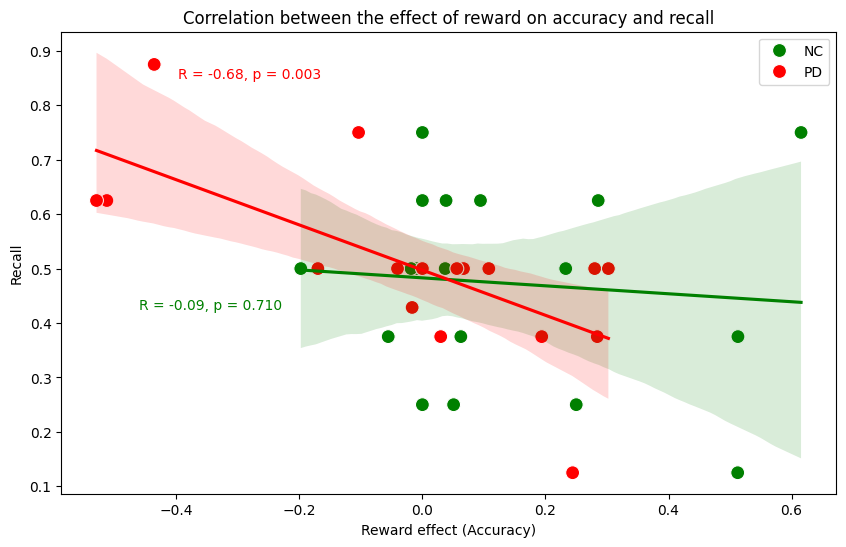

In [77]:
# Scatter plots - Accuracy Reward effect and recall

# Combine dictionaries vertically
Combined_recall = pd.concat([NC_Q_Data, PD_Q_Data], axis=0)

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Recall', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (Accuracy)')
plt.ylabel('Recall')
plt.title('Correlation between the effect of reward on accuracy and recall')
plt.text(0.15, 0.9, f'R = {pearson_corr_pd_acc_corr_recall:.2f}, p = {p_value_pd_acc_corr_recall:.3f}', transform=plt.gca().transAxes, color = 'r')
plt.text(0.1, 0.4, f'R = {pearson_corr_nc_acc_corr_recall:.2f}, p = {p_value_nc_acc_corr_recall:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

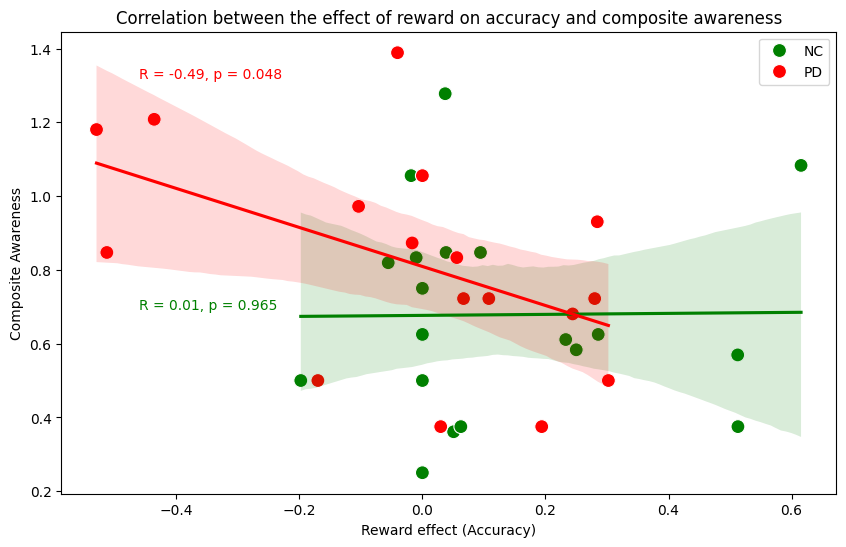

In [78]:
# Scatter plots - Accuracy Reward effect and composite awareness

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Composite Awareness', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (Accuracy)')
plt.ylabel('Composite Awareness')
plt.title('Correlation between the effect of reward on accuracy and composite awareness')
plt.text(0.1, 0.9, f'R = {pearson_corr_pd_acc_corr_ca:.2f}, p = {p_value_pd_acc_corr_ca:.3f}', transform=plt.gca().transAxes, color = 'r')
plt.text(0.1, 0.4, f'R = {pearson_corr_nc_acc_corr_ca:.2f}, p = {p_value_nc_acc_corr_ca:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

### Result: Explicit memory for rewarded pairs was not strong. However, for PD patients, the effect of reward on learning was dependent on their level of awareness: Higher awareness was associated with a lower effect.